# Задача на регуляризцию

Загрузка данных

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston

from scipy.spatial import distance
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import string
import nltk


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

data = pd.read_csv('non_linear.csv', sep=',')
data.head()

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.119
Качество на обучении: 0.052


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.97797e-18): result may not be accurate.
  overwrite_a=True).T


у класса *Ridge* в конструкторе есть параметр регуляризации обучите регрессию 

* c параметром $\alpha=0.01$
* степень полинома $n=12$

Сравните с моделью при степени $n=12$ *без регуляризации*.

Как изменилась ошибка на обучении? Как изменилась ошибка на валидации? Удалось ли победить переобучение? Используйте 

**С регуляризацией α=0.01, n = 12**

In [21]:
degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.077
Качество на обучении: 0.058


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.80258e-22): result may not be accurate.
  overwrite_a=True).T


**Без регуляризации, n = 12**

In [22]:
degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge().fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.094
Качество на обучении: 0.063


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.00255e-20): result may not be accurate.
  overwrite_a=True).T


**Сравнивая полученные результаты, видим, что применение коэффициента регуляризации понижает ошибку валидации, то есть удаётся победить переобучение, повышая коэффициент регуляризации.**

### Домашняя работа: Lasso vs Ridge

На данных из файла `data/non_linear.csv`
* сгенерируйте данные до степени *degree = 8* включительно
* обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных
* используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей
* постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://github.com/aleksandr-dzhumurat/data_management/blob/master/jupyter_notebooks/img/coeff_example.png?raw=1)

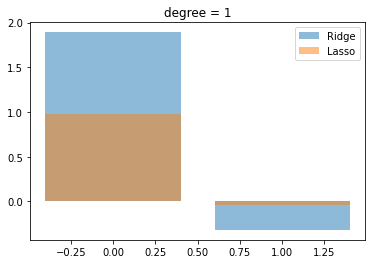

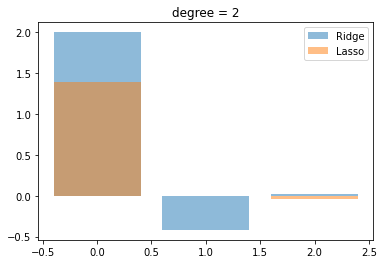

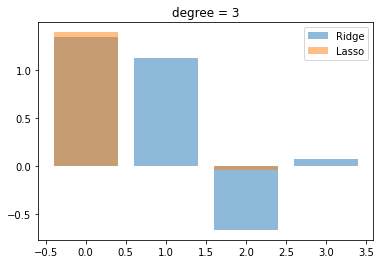

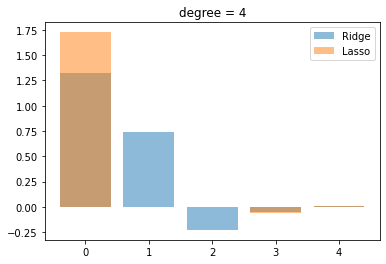

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9365323182554341, tolerance: 0.002448155578496404
  positive)


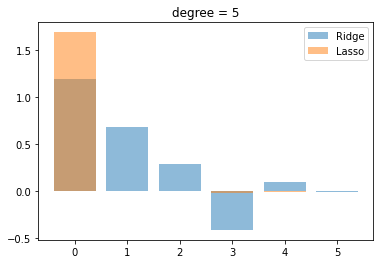

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6197582700045894, tolerance: 0.002448155578496404
  positive)


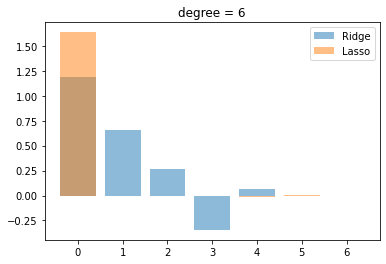

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.359423025060299, tolerance: 0.002448155578496404
  positive)


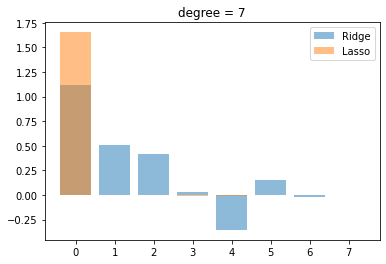

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7134369621139607, tolerance: 0.002448155578496404
  positive)


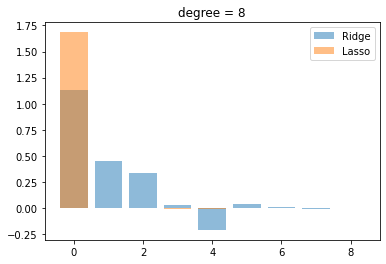

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

alpha = 0.8
for degree in range(1,9):
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    
    model_r = Ridge(alpha=alpha).fit(X_train, y_train)
    y_pred_r = model_r.predict(X_valid)
    y_pred_train_r = model_r.predict(X_train)
    w_sklearn_r = np.append([model_r.intercept_], model_r.coef_)
    
    model_l = Lasso(alpha=alpha).fit(X_train, y_train)
    y_pred_l = model_l.predict(X_valid)
    y_pred_train_l = model_l.predict(X_train)
    w_sklearn_l = np.append([model_l.intercept_], model_l.coef_)

    plt.title(f'degree = {degree}')
    plt.bar(np.arange(len(w_sklearn_r)),w_sklearn_r, alpha=0.5, label='Ridge')
    plt.bar(np.arange(len(w_sklearn_l)),w_sklearn_l, alpha=0.5, label='Lasso')
    plt.legend(loc='upper right', prop={'size': 10})
    
    plt.show()

# Домашнее задание: пишем Ridge регрессию.

Мы использовали реализацию Ridge регрессию из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

In [24]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance


X = generate_degrees(data['x_train'], degree)
deg = 8
E = np.eye(deg)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

X = X_train
y = y_train

w_analytic = inv(X.T.dot(X) + deg*E).dot(X.T).dot(y)

print(f'Коэффициенты полиномиальной регрессии {w_analytic}')


Коэффициенты полиномиальной регрессии [ 0.51152727  0.40716153  0.22421288 -0.04867427 -0.17822689  0.08659551
 -0.01446891  0.00083008]


# Домашнее задание: подбираем шаг градиентного спуска 

Очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое качество *RMSE* у Вашего решения? Визуализируйте функцию потерь

In [25]:
data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


In [26]:
def initialize_sgd(X_train, 
                   y_train, 
                   X_valid,
                   y_valid,
                   rand_state:int, 
                   eps:float, 
                   eta:float
                  ):
    # можно установить None для эксперимента
    rand_state = rand_state
            
    # инициализация регрессора
    sgd_regressor = SGDRegressor(
        learning_rate='constant',
        eta0=eta,
        fit_intercept=True,
        random_state=rand_state
    )

    # инициализация весов случайным образом
    w_current = np.random.random(2)
    epsilon = eps

    # изменения весов и ошибка на валидации
    weight_evolution, rmse_evolution = [], []

    for step in range(800):
        # шаг градиентного спуска
        sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
        # отслеживаем изменения весов
        weight_evolution.append(
            distance.euclidean(w_current, sgd_regressor.coef_)
        )
        # проверяем критерий остановки
        if weight_evolution[-1] < epsilon:
            print("Итерации остановлены на шаге %d" % step)
            break
            
        rmse_evolution.append(
            mean_squared_error(y_valid, sgd_regressor.predict(X_valid))
        )
        # обновление весов регрессии
        w_current = sgd_regressor.coef_.copy()
    
    return sgd_regressor, rmse_evolution, step

In [27]:
etas = np.linspace(0.01, 0.06, num=10)
res = {}

for eta in etas:
    sgd_regressor, rmse_evolution, step = initialize_sgd(
        X_train, y_train, X_valid, y_valid, 
        rand_state=42, eps=0.0001, eta=eta
    )
    res[eta] = [sgd_regressor, rmse_evolution, step]
    
res_f = min(res.items(), key=lambda item:item[1][-1])
eta, (sgd_regressor, rmse_evolution, step) = res_f

print('\n',f"Наименьший шаг: {step} с eta {eta:.3f}")

Итерации остановлены на шаге 191
Итерации остановлены на шаге 132
Итерации остановлены на шаге 102
Итерации остановлены на шаге 84
Итерации остановлены на шаге 72
Итерации остановлены на шаге 64
Итерации остановлены на шаге 58
Итерации остановлены на шаге 53
Итерации остановлены на шаге 49
Итерации остановлены на шаге 46

 Наименьший шаг: 46 с eta 0.060


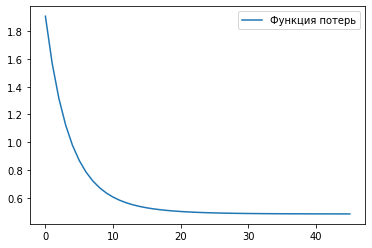

In [28]:
plt.plot(range(step), rmse_evolution, label='Функция потерь')
plt.legend()

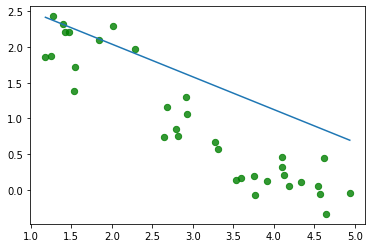

In [29]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)

y_linspace= sgd_regressor.predict(x_linspace.reshape(-1,1))

plt.plot(x_linspace, y_linspace)
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')

plt.show()

# Домашнее задание: SGD на многомерных данных

Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [30]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, y_train.shape

((404, 13), (404,))

In [32]:
reg = SGDRegressor(random_state=42).fit(X_train, y_train)
reg.n_iter_, r2_score(reg.predict(X_test), y_test)

(75, -38.44889329616654)

# Домашняя работа: добавляем регуляризацию в SGD

В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} 1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2\cdot 1\right)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2x_k\right)& k\neq 0 \\
\end{array}
\right.
$$

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.

Загружаем исходные данные

In [34]:
import numpy as np
import pandas as pd

data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Код для SGD

In [35]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) + X
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.00578, grad=[-0.69363309  0.20037682]
step 200 |w-w_next|=0.00475, grad=[-0.57080857  0.16489524]
step 300 |w-w_next|=0.00391, grad=[-0.4697331   0.13569655]
step 400 |w-w_next|=0.00322, grad=[-0.38655549  0.11166819]
step 500 |w-w_next|=0.00265, grad=[-0.31810649  0.09189464]
step 600 |w-w_next|=0.00218, grad=[-0.26177804  0.07562247]
step 700 |w-w_next|=0.00179, grad=[-0.2154239   0.06223168]
step 800 |w-w_next|=0.00148, grad=[-0.17727789  0.05121206]
step 900 |w-w_next|=0.00121, grad=[-0.14588655  0.04214372]
step 1000 |w-w_next|=0.00100, grad=[-0.12005381  0.03468116]


# Домашнее задание: извлечение признаков из текста

Реализуем пайплайн в виде функции, при помощи которой обработаем все текстовые описания. Для каждого описания
* проводим токенизацию
* удаляем пунктуацию
* приводим к нижнему регистру
* удаляем стоп-слова


Примените процедуру токенизации к файлу brand_tweets_valid.csv

Сколько уникальных токенов получилось?

In [42]:
df = pd.read_csv('brand_tweets.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)
print(df.shape)

df.head()

(3904, 3)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [50]:
# Disable warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [54]:
import nltk
import string
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt', download_dir='.')

en_stops = set(stopwords.words('english'))

string.punctuation

def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    filtered_tokens = [
    ]
    # -- ВАШ КОД ТУТ --
    tokenized_text = nltk.word_tokenize(raw_text.lower())
    
    for token in tokenized_text:
        if token not in string.punctuation and token not in en_stops:
            filtered_tokens.append(token)
    # -----------------
    return filtered_tokens

# применяем функцию в датафрейму с помощью метода .apply()
tokenized_tweets= df.tweet_text.apply(tokenize_text)

# добавляем новую колонку в исходный датафрейм
df = df.assign(
    tokenized=tokenized_tweets
)

df.tokenized.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to ....
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [wesley83, 3g, iphone, 3, hrs, tweeting, rise_...
1    [jessedee, know, fludapp, awesome, ipad/iphone...
2        [swonderlin, wait, ipad, 2, also, sale, sxsw]
3    [sxsw, hope, year, 's, festival, n't, crashy, ...
4    [sxtxstate, great, stuff, fri, sxsw, marissa, ...
Name: tokenized, dtype: object

**Количество уникальных токенов**

In [55]:
unique_tokens = []

for _list in df.tokenized.tolist():
    for word in _list: 
        if word not in unique_tokens:
            unique_tokens.append(word)
print(len(unique_tokens))

7311


# Домашнее задание: поиск дубликатов в тексте

Потренируйтесь в нахождении матрицы схожести для валидационного сета

загрузите brand_tweets_valid.csv
примените объект vectorizer, обученный на датасете brand_tweets.csv (просто скопируйте этот код из урока)
примените функцию pairwise_distances к полученной матрице

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df_valid = pd.read_csv('brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

# разбиваем каждый документ на токены
vectorizer = CountVectorizer(tokenizer=tokenize_text)
# применяем наш объект-токенизатор к датафрейму с твитами
document_matrix = vectorizer.fit_transform(df_valid.tweet_text.values)
# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix

from sklearn.metrics import pairwise_distances

tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")

tweet_distance.shape


(402, 402)

* Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с id=14.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение

**Top-5 твитов, похожих на твит валидационного сета с id=14**

In [59]:
source_tweet_index = 14
sorted_similarity = np.argsort(-tweet_distance[source_tweet_index,:])

for i in range(6):
    print(f'Tweet {i}:\n{df.iloc[sorted_similarity[i]].tweet_text}')
    print('\n\n')

Tweet 0:
haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw



Tweet 1:
#Samsung, #Sony follow #Apple, #HP lead @mention {link} #Austin #atx #SXSW



Tweet 2:
I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone



Tweet 3:
Following #sxsw Tweets on Google Realtime, four platforms on Tweet Deck and listening to panel, realizing I'm spoken to no one here today.



Tweet 4:
#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan



Tweet 5:
Posted up at the DMI House, Intimate Stranger on the stage, they got a restaurant crowd sitting down to deal wif  #sxsw {link}





**Визуализируем гистограмму значений в матрице схожести**

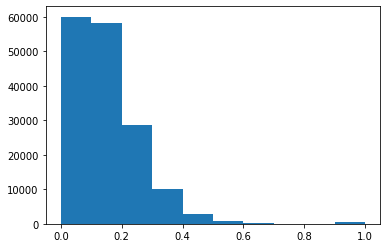

In [60]:
x,y = np.histogram(tweet_distance)
plt.hist(y[:-1], y, weights=x)
plt.show()

**Напишем функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение**

In [61]:
def eval_tweets(tweet_id:int, threshold:float, tweet_distance):
    ans = []
    if (0 <= threshold <= 1):
        sorted_eval = np.argsort(-tweet_distance[tweet_id,:])
    
        for index in sorted_eval:
            eval_ = tweet_distance[tweet_id][index]
            if eval_ < threshold:
                continue
            ans.append((index, eval_))
        return ans


res = eval_tweets(20, 0.5, tweet_distance)

for i in res:
    print(f'Eval value: {i[1]}\n{df.iloc[sorted_similarity[i[0]]].tweet_text}\n\n')

Eval value: 1.0
Gotta love this #SXSW Google Calendar featuring top parties/ show cases to check out.  RT @hamsandwich via @ischafer =&gt;http://bit.ly/aXZwxB


Eval value: 0.9999999999999999
Reminder: Charles Chen will be talking about Android and ChromeOS access today @mention 1PM @mention the Google booth in Exhibit Hall 3. #sxsw


Eval value: 0.8922178162191937
{link} RT @mention &quot;Google before you tweet&quot; is the new &quot;think before you speak.&quot; - Mark Belinsky, #911tweets panel at #SXSW.


